## Keywords

In [1]:
import pandas as pd

/anaconda3/envs/ibm/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)
/anaconda3/envs/ibm/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)


In [2]:
content = pd.read_csv('sqlResult_1558435.csv', encoding='gb18030')

In [3]:
len(content)

89611

In [4]:
content.head()

,id,author,source,content,feature,title,url
0,89617,NaN,快科技@http://www.kkj.cn/,此外，自本周（6月12日）起，除小米手机6等15款机型外，其余机型已暂停更新发布（含开发版/...,"{""type"":""科技"",""site"":""cnbeta"",""commentNum"":""37""...",小米MIUI 9首批机型曝光：共计15款,http://www.cnbeta.com/articles/tech/623597.htm
1,89616,NaN,快科技@http://www.kkj.cn/,骁龙835作为唯一通过Windows 10桌面平台认证的ARM处理器，高通强调，不会因为只考...,"{""type"":""科技"",""site"":""cnbeta"",""commentNum"":""15""...",骁龙835在Windows 10上的性能表现有望改善,http://www.cnbeta.com/articles/tech/623599.htm
2,89615,NaN,快科技@http://www.kkj.cn/,此前的一加3T搭载的是3400mAh电池，DashCharge快充规格为5V/4A。\r\n...,"{""type"":""科技"",""site"":""cnbeta"",""commentNum"":""18""...",一加手机5细节曝光：3300mAh、充半小时用1天,http://www.cnbeta.com/articles/tech/623601.htm
3,89614,NaN,新华社,这是6月18日在葡萄牙中部大佩德罗冈地区拍摄的被森林大火烧毁的汽车。新华社记者张立云摄\r\n,"{""type"":""国际新闻"",""site"":""环球"",""commentNum"":""0"",""j...",葡森林火灾造成至少62人死亡 政府宣布进入紧急状态（组图）,http://world.huanqiu.com/hot/2017-06/10866126....
4,89613,胡淑丽_MN7479,深圳大件事,（原标题：44岁女子跑深圳约会网友被拒，暴雨中裸身奔走……）\r\n@深圳交警微博称：昨日清...,"{""type"":""新闻"",""site"":""网易热门"",""commentNum"":""978"",...",44岁女子约网友被拒暴雨中裸奔 交警为其披衣相随,http://news.163.com/17/0618/00/CN617P3Q0001875...


In [7]:
content.iloc[3]

id                                                     89614
author                                                   NaN
source                                                   新华社
content      这是6月18日在葡萄牙中部大佩德罗冈地区拍摄的被森林大火烧毁的汽车。新华社记者张立云摄\r\n
feature    {"type":"国际新闻","site":"环球","commentNum":"0","j...
title                          葡森林火灾造成至少62人死亡 政府宣布进入紧急状态（组图）
url        http://world.huanqiu.com/hot/2017-06/10866126....
Name: 3, dtype: object

In [8]:
content.iloc[0]

id                                                     89617
author                                                   NaN
source                                快科技@http://www.kkj.cn/
content    此外，自本周（6月12日）起，除小米手机6等15款机型外，其余机型已暂停更新发布（含开发版/...
feature    {"type":"科技","site":"cnbeta","commentNum":"37"...
title                                   小米MIUI 9首批机型曝光：共计15款
url           http://www.cnbeta.com/articles/tech/623597.htm
Name: 0, dtype: object

## Term Frequence

TF-Term Frequence

In [9]:
content.iloc[0]['content']

'此外，自本周（6月12日）起，除小米手机6等15款机型外，其余机型已暂停更新发布（含开发版/体验版内测，稳定版暂不受影响），以确保工程师可以集中全部精力进行系统优化工作。有人猜测这也是将精力主要用到MIUI 9的研发之中。\r\nMIUI 8去年5月发布，距今已有一年有余，也是时候更新换代了。\r\n当然，关于MIUI 9的确切信息，我们还是等待官方消息。\r\n'

In [5]:
import jieba

In [6]:
def cut(string): return list(jieba.cut(string))

In [12]:
content_of_xiaomi = cut(content.iloc[0]['content'])

Building prefix dict from the default dictionary ...
Dumping model to file cache /var/folders/lx/xy106sq15v1c9hbk_hg9wbdh0000gn/T/jieba.cache
Loading model cost 0.916 seconds.
Prefix dict has been built succesfully.


In [14]:
from collections import Counter

In [52]:
Counter(content_of_xiaomi).most_common()[:10]

[('，', 9),
 ('。', 4),
 ('MIUI', 3),
 (' ', 3),
 ('\r\n', 3),
 ('（', 2),
 ('6', 2),
 ('月', 2),
 ('）', 2),
 ('机型', 2)]

## Document Frequency

In [21]:
content = content.fillna('')

In [23]:
all_news_content = content['content']

In [25]:
from tqdm import tqdm_notebook

In [26]:
all_occurences = []

In [30]:
for c in tqdm_notebook(all_news_content, total=len(all_news_content)):
    all_occurences.append(set(cut(c)))

In [39]:
import math

In [74]:
def inverse_document_frequency(word):
    eps = 1e-6
    return math.log10(len(all_occurences) / (sum(1 for w in all_occurences if word in w) + eps))

In [50]:
document_frequency('我们')

1.0316991547174248

In [71]:
def tf(word, cut_words_counter):
    return cut_words_counter[word] / sum(cut_words_counter.values())

In [56]:
tf('小米', Counter(content_of_xiaomi))

0.009615384615384616

In [57]:
def tfidf(word, cut_words_counter):
    w_tf = tf(word, cut_words_counter)
    
    idf = inverse_document_frequency(word)
    
    return w_tf * idf

In [60]:
tfidf('小米', Counter(content_of_xiaomi))

0.027226893405514308

In [61]:
tfidf('的', Counter(content_of_xiaomi))

0.0019753497996075134

In [69]:
def get_words_importance(cut_words):
    importance = {
        w: tfidf(w, Counter(cut_words)) for w in set(cut_words)
    }
    
    return sorted(importance.items(), key=lambda x: x[1], reverse=True)

In [68]:
test_news = """12月8日2时23分，西昌卫星发射中心，嫦娥四号探测器由长征三号乙运载火箭成功发射。新华社发

昨日凌晨2时23分，我国嫦娥四号月球探测器在西昌卫星发射中心成功发射，我国第二个月球着陆器和月球车踏上登月征程。发射任务由长征三号乙运载火箭实施。

火箭将嫦娥四号送入地月转移轨道后，探测器将经过数十天在轨飞行、轨道修正、近月制动、环月飞行等，预计明年1月初着陆月面，择机释放巡视器。

嫦娥四号的目的地是月球背面南极-艾特肯盆地，新月球车将与“玉兔”号在月球两面遥遥相对。这将是人类探测器首次在月球背面着陆，在人类从未直接看见的“月之暗面”实施月球探测和天文观测。

据国防科工局、国家航天局介绍，嫦娥四号任务的工程目标包括两方面：研制发射月球中继通信卫星，实现国际首次地月拉格朗日L2点的测控及中继通信；研制发射月球着陆器和巡视器，实现国际首次月球背面软着陆和巡视探测。

嫦娥四号的科学任务，一是开展月球背面低频射电天文观测与研究，二是进行月球背面巡视区形貌、矿物组分及月表浅层结构探测与研究，三是试验性开展月球背面中子辐射剂量、中性原子等月球环境探测研究。

航天专家庞之浩介绍，在月球背面着陆探测，对研究月球和地球的早期历史也具有重要价值。

嫦娥四号还承担了国际合作项目。嫦娥四号任务中，我国与荷兰、德国、瑞典、沙特开展了4项科学载荷方面的国际合作，搭载了3项由哈尔滨工业大学、中山大学、重庆大学等国内高校研制的科学技术试验项目。

焦点1

嫦娥四号如何着陆？

5年前，嫦娥三号着陆在月球正面的虹湾。那里布满月海玄武岩，地势较为开阔、平坦，位于大型撞击坑、月海、高地(山脉)交汇地区，有利于科学勘察目标的选择。

而嫦娥四号的主着陆区为月球背面南极-艾特肯盆地，着陆区面积比虹湾地区小了许多。而且月球背面山峰林立，遍布撞击坑，很难找出更大、更平坦的地方，嫦娥三号着陆区地形起伏仅800米，而嫦娥四号着陆区起伏达到了6000米。因此，嫦娥四号着陆器，需要具有比嫦娥三号更准确的着陆精度。

由于落月过程地球方向不直接可见，所有信息传输都需要在中继星“鹊桥”的中转下完成。整个落月过程由GNC（制导、导航与控制）系统自主操控，加之回传画面的延迟，对地面人员来说，这个过程近乎是“盲降”。

焦点2

为何要去月球背面？

航天科技集团五院专家介绍，月球背面的探测，可以推动月基科学研究的不断深入。

月球背面没有来自地球的无线电波的干扰，是进行射电天文观测的最佳场所，如果能利用这一自然地形架设无线电望远镜，就好比把“天文台”搬到了月球背面。嫦娥四号着陆器在月球背面软着陆后，将开展月基低频射电天文观测研究，预期可以获得一批原创性的科学成果。

月球背面探测，也有助于推动月球资源的研究和开发利用。月球蕴藏着丰富的矿产和能源资源，开发和利用月球资源是人类探测月球的原动力之一。近年来，美国等国家相继制定了包括月球背面资源调查研究计划。通过嫦娥四号对着陆区地形地貌、矿物组分、巡视区浅层结构、地幔物质等进行科学探测与研究，将为月球资源的开发利用提供极有价值的第一手资料。

由于月球背面探测的难度，嫦娥四号任务也将助推我国航天和相关学科技术的突破。

据嫦娥四号研制人员介绍，要完成前无古人的月球背面之旅，嫦娥四号面临几大技术难点：地月拉格朗日L2平动点轨道精确设计与控制，地月拉格朗日L2点远距离数据中继，复杂地形环境下的安全着陆等。

为了突破这些技术难点，我国航天界将实现三个国际首次，即首次月球背面软着陆和巡视探测、首次月球拉格朗日L2点中继与探测、首次月基低频射电天文观测，以及国内首次实测月夜期间浅层月壤温度。这一重大科学创新工程的实施，将推动航天技术和其他科学领域相关技术的持续发展。

焦点3

新月球车与“玉兔”有何不同？

今年8月15日，嫦娥四号月球车外观在北京首次亮相，与“玉兔”恰似孪生姐妹。嫦娥四号月球车总重量约140公斤，是全球迄今重量最小的月球车。

探月工程副总指挥、国家国防科工局探月与航天工程中心主任刘继忠介绍，嫦娥四号月球车基本继承了“玉兔”的状态，但针对月球背面复杂的地形条件、中继通信新的需求和科学目标实际需要，做了适应性更改和有效载荷配置调整。

工作在月球表面，月球车将面临多种极端条件的考验。

2013年12月15日，嫦娥三号着陆器与巡视器分离，“玉兔”抵达月球表面。据中国工程院院士、中国探月工程总设计师吴伟仁介绍，月球环境曾对“玉兔”造成影响，例如月夜极低气温导致“玉兔”裸露在外的电缆发生故障。

基于“玉兔号”的任务经验，嫦娥四号针对其遇到的问题进行了针对性改进。吴伟仁说，嫦娥四号的月球车仅在电缆钩挂、摩擦方面就做了上千次试验，同时也尽量减少电缆裸露在外的面积，减少电缆的故障风险。

吴伟仁透露，嫦娥三号着陆器和月球车设计寿命分别为1年和3个月，但最终月球车工作了2年9个月，着陆器目前仍在运行，工作5年状态依然很好。嫦娥四号月球车设计寿命也是3个月，但预计工作时间将比“玉兔号”更长。

焦点4

“鹊桥”“嫦四”有何关联？

今年5月21日，“鹊桥”中继卫星发射升空，也被称为嫦娥四号任务的先声。

嫦娥四号探测器包括着陆器和巡视器(即月球车，此前探月工程办公室曾面向全社会为月球车征名，目前名称尚未发布），但嫦娥四号系统里还有一个“信使”——“鹊桥”中继卫星。

由于嫦娥四号降落在月球背面，始终与地球“背对背”，无法直接与地球通信。为解决通信问题，科学家找到一个能同时“看到”地球和月球的位置——地月拉格朗日L2点（位于地月球心连线上靠近月球的一侧，距月球约6.5万公里），并在这里部署一颗通信卫星。

“鹊桥”已经于今年5月21日发射升空，目前运行在地月拉格朗日L2点Halo轨道上，是人类历史上第一颗地球轨道外专用中继通信卫星。任务中，地球地面和嫦娥四号都先发射信号给“鹊桥号”，再由其转发给另一方。

■ 揭秘

“月之暗面”：更白更厚更崎岖

过去60年，人类共发射了132个左右的月球探测器，包括65个月球着陆器，但仅有不载人的环绕月球轨道器和载人的阿波罗号飞船“看”到过月球背面。主要是由于从地球向月球背面发射通讯信号，会受到月球整体阻挡，地面通信和测控的难题，阻挡了月球背面着陆计划。

月球总是一面朝向地球

由于月球自转周期和公转周期相等，加上被地球潮汐锁定，地球强大的引力让月球总是一面朝向地球。

美国航空航天学会会员、“小火箭”联合会创始人邢强博士告诉记者，约41%月面无法被地球直接观测到。因为当飞行器飞到月球背面，就难以和地球建立通信，这也是长期以来，人类探测器从未在月球背面着陆的主要原因。

可以说，月球背面对于人类来说，是“秘境中的秘境”。

随着由中国航天科技集团五院研制的嫦娥四号从西昌出发，人类首次月球背面软着陆巡视探测的大幕正式拉开。嫦娥四号将第一次触及月球背面，这也是中国探测器目前到达的最远的土地。

并非完全看不到月背

据五院科研人员介绍，月球存在着“天秤动”，像钟摆一样来回摆动，因此，至少有10%至20%的月球背面的边缘地带可以从地球上看到，比如一个跨越1000千米的撞击盆地——东海。

1959年10月7日，苏联“月球三号”探测器传回月球背面的第一张照片后，月球背面的“真容”就第一次被揭开了。依照这些珍贵的照片资料，苏联在1960年11月6出版了第一份月球背面地图，一年之后，又制作了第一个月球仪，更加清晰地呈现出月球背面的初步特征。

1965年7月20日，苏联“探测器三号”传送回了25张画质更好的月球背面照片，可以看到月球背面有一条长数百千米的链状陨石坑。1967年，苏联根据这批照片出版了包含4000个新发现的月球背面地形目录的地图，同年发布了第一份比例为1:5000000完整的月面图和修订后完整的比例为1:10000000月球仪，月球95%的表面都在上面呈现了出来。

人类首次与月背面对面

人类首次与月背面对面是在1968年，美国“阿波罗八号”在进行载人登月任务试验的时候，宇航员威廉·安德斯首次看到月球背面。他描述说：“月球背面看起来像我在孩提时玩过一段时间的沙堆，它们全都被翻起来，没有边界，到处是一些碰撞痕和坑洞”。

从那时开始直到“阿波罗十七号”，宇航员都曾看到过月球的背面。

2010年12月21日，美国国家航空航天局（NASA）的“月球勘测轨道器”拍摄了一组高清月球背面照片，解析度是以往所拍月球背面照片的106倍，所呈现的细节精细程度也创下了历史纪录。根据这些最新照片数据，美国宇航局绘制了月球背面数字海拔地形图，直观地揭示了月球背面的地形。

如今，人类观察月背的视角将从太空中变为身临其境。嫦娥四号将首次实现月球背面软着陆和巡视勘察，迎接它的将是怎样的环境呢？

布满巨坑的崎岖陆地

据航天科技集团五院专家介绍，乍一看上去，月球背面“面孔”并不漂亮，像是一张“麻子脸”，陨石坑的数量比月球正面要多很多。

月背的“皱纹”也很多，布满沟壑、峡谷和悬崖，而月球正面则更平坦。月背还有几处巨大的暗斑，暗斑中的物质与月面普通物质相比有很大不同，这种现象似乎能够说明，月球背面由于毫无遮拦地暴露在太空里，因而遭遇了大量天体直接撞击。经年累月，月球就像一个盾牌，为地球挡住陨石，守护着地球的安全。

月球背面月壳整体比正面更厚，究竟是什么原因导致月壳厚度不一样，众说纷纭。照片显示，月球背面巨大的陨石坑都呈现出白色，好像从来没有暗色的熔岩从上面流过。科学家们研究认为，由于月球背面的月壳很厚，熔岩无法溢出，而正面月壳很薄，熔岩很容易破缝流淌在表面，所以颜色比正面要白得多。

此外，月球正面月海很多，而月球背面却只有3个，分别叫东海、莫斯科海和智海。月球正面有许多巨大绵延起伏的山峦，而背面却不像正面那么多。

关键一步已经迈出

我们只能看到月球的一边，但这并不是说另外一面永远是黑暗的。事实上，当我们看到整个月球正面的时候，即满月时，它的另一面是黑暗的；而月初月末时，月球背面则是阳光普照。

由于目前还没有宇航员或月球车登上月球的背面，因此，人们对月球背面详细情况除了借助照片判断，其他的知之甚少。而嫦娥四号探测器，为人类逐步揭开月球背面的奥秘迈出了关键的一步。"""

In [77]:
cut_test_news = cut(test_news)

In [82]:
lunar_important = get_words_importance(cut_test_news)

In [83]:
xiaomi_important = get_words_importance(content_of_xiaomi)

In [80]:
import wordcloud

In [81]:
word_cloud = wordcloud.WordCloud(font_path='/Users/mqgao/Downloads/simhei/SimHei.ttf')

In [88]:
%matplotlib inline

In [89]:
import matplotlib.pyplot as plt

In [95]:
import numpy as np

In [99]:
from PIL import Image

In [106]:
moon_mask = np.array(Image.open('/Users/mqgao/Downloads/alice_mask.png'))

In [107]:
word_cloud_with_mask = wordcloud.WordCloud(font_path='/Users/mqgao/Downloads/simhei/SimHei.ttf', mask=moon_mask)

In [108]:
def plot_word_cloud_by_importance(importance):
    plt.imshow(word_cloud_with_mask.generate_from_frequencies({w: fre for w, fre in importance}))

In [111]:
word_cloud_with_mask.generate_from_frequencies({w: fre for w, fre in lunar_important}).to_file('mask_test.png')

In [114]:
!open mask_test.png

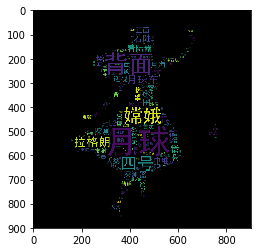

In [109]:
plot_word_cloud_by_importance(lunar_important)

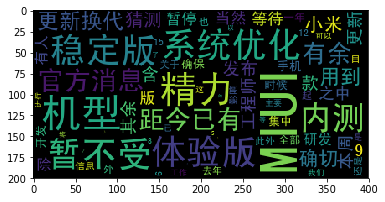

In [93]:
plot_word_cloud_by_importance(xiaomi_important)

## Get the related keywords

In [12]:
content = content.fillna('')

In [13]:
all_content = ' '.join(content['content'].tolist())

In [14]:
import re

In [15]:
def token(string):
    return re.findall(r'[\w\d]+', string)

In [22]:
all_content = ''.join(token(all_content))

In [23]:
len(all_content)

33328544

In [24]:
all_cut_words = cut(all_content)

Building prefix dict from the default dictionary ...
Loading model from cache /var/folders/lx/xy106sq15v1c9hbk_hg9wbdh0000gn/T/jieba.cache
Loading model cost 0.890 seconds.
Prefix dict has been built succesfully.


In [42]:
from gensim.models import Word2Vec

In [45]:
mini_all_cut_words = all_cut_words[:10000]

In [58]:
from gensim.models.word2vec import LineSentence

In [64]:
with open('all_cut_words.txt', 'w', encoding='utf-8') as f:
    f.write(' '.join(all_cut_words))

In [65]:
news_word2vec = Word2Vec(LineSentence('all_cut_words.txt'), size=35, workers=8)

In [79]:
news_word2vec.most_similar('葡萄牙', topn=20)

/anaconda3/envs/ibm/lib/python3.6/site-packages/ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `most_similar` (Method will be removed in 4.0.0, use self.wv.most_similar() instead).
  """Entry point for launching an IPython kernel.
/anaconda3/envs/ibm/lib/python3.6/site-packages/gensim/matutils.py:737: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int64 == np.dtype(int).type`.
  if np.issubdtype(vec.dtype, np.int):


[('意大利', 0.8753021359443665),
 ('比利时', 0.8329282999038696),
 ('克罗地亚', 0.8313963413238525),
 ('捷克', 0.8310271501541138),
 ('摩洛哥', 0.8261146545410156),
 ('乌拉圭', 0.8224618434906006),
 ('拉脱维亚', 0.8104860186576843),
 ('奥地利', 0.8049799799919128),
 ('科特迪瓦', 0.8025559782981873),
 ('罗马', 0.800704300403595),
 ('伊斯坦布尔', 0.7947038412094116),
 ('比什凯克', 0.7936158180236816),
 ('多哈', 0.7890053391456604),
 ('巴拉圭', 0.7834125757217407),
 ('圣胡安', 0.7777934670448303),
 ('索', 0.7772760987281799),
 ('西班牙', 0.7749499082565308),
 ('斯洛文尼亚', 0.7741921544075012),
 ('基辅', 0.7691129446029663),
 ('里斯本', 0.7672563195228577)]

## 1. More Data, Better Result
> We need merge the general dataset like `wikipedia` with specific domain dataset like `new data`

## 2. Fine-tune

In [115]:
from collections import defaultdict

In [116]:
def get_related_words(initial_words, model):
    max_size = 500
    seen = defaultdict(int)
    unseen = [initial_words]
    
    while unseen and len(seen) < max_size:
        if len(seen) % 100 == 0:
            print('seen length: {}'.format(len(seen)))
        node = unseen.pop(0)

        new_expanding = [w for w, s in model.most_similar(node, topn=20)]
        
        unseen += new_expanding
        
        seen[node] += 1  
        # if we need more sophsiticated, we need change the value as the function(layer, similarity)
        
    return seen

In [117]:
related_words = get_related_words('俄罗斯', news_word2vec)

seen length: 0


/anaconda3/envs/ibm/lib/python3.6/site-packages/ipykernel_launcher.py:11: DeprecationWarning: Call to deprecated `most_similar` (Method will be removed in 4.0.0, use self.wv.most_similar() instead).
  # This is added back by InteractiveShellApp.init_path()


seen length: 100
seen length: 100
seen length: 100
seen length: 100
seen length: 100
seen length: 100
seen length: 100
seen length: 100
seen length: 100
seen length: 100
seen length: 100
seen length: 100
seen length: 100
seen length: 100
seen length: 100
seen length: 100
seen length: 100
seen length: 100
seen length: 200
seen length: 200
seen length: 200
seen length: 200
seen length: 300
seen length: 300
seen length: 300
seen length: 300
seen length: 300
seen length: 300
seen length: 300
seen length: 300
seen length: 300
seen length: 300
seen length: 400


## Breaking Until 10:43

In [120]:
sorted(related_words.items(), key=lambda x: x[1], reverse=True)[:50]

[('土耳其', 181),
 ('沙特', 159),
 ('俄罗斯', 144),
 ('以色列', 134),
 ('伊朗', 132),
 ('卡塔尔', 124),
 ('墨西哥', 119),
 ('埃及', 105),
 ('波兰', 104),
 ('该国', 103),
 ('德国', 96),
 ('美国', 95),
 ('新加坡', 93),
 ('南非', 90),
 ('澳大利亚', 88),
 ('叙利亚', 88),
 ('菲律宾', 85),
 ('北约', 85),
 ('比利时', 84),
 ('乌克兰', 81),
 ('英国', 74),
 ('沙特阿拉伯', 73),
 ('印度', 68),
 ('朝鲜', 66),
 ('利比亚', 66),
 ('希腊', 62),
 ('巴拿马', 62),
 ('叙', 62),
 ('阿富汗', 61),
 ('瑞士', 61),
 ('欧洲', 60),
 ('巴西', 60),
 ('保加利亚', 58),
 ('约旦', 57),
 ('秘鲁', 57),
 ('阿联酋', 55),
 ('法国', 54),
 ('古巴', 53),
 ('白俄罗斯', 52),
 ('也门', 52),
 ('黑山', 51),
 ('伊拉克', 49),
 ('索马里', 49),
 ('尼日利亚', 49),
 ('意大利', 48),
 ('日本', 47),
 ('瑞典', 47),
 ('匈牙利', 45),
 ('邻国', 41),
 ('马来西亚', 40)]

In [111]:
news_word2vec.most_similar('中国', topn=30)

/anaconda3/envs/ibm/lib/python3.6/site-packages/ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `most_similar` (Method will be removed in 4.0.0, use self.wv.most_similar() instead).
  """Entry point for launching an IPython kernel.
/anaconda3/envs/ibm/lib/python3.6/site-packages/gensim/matutils.py:737: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int64 == np.dtype(int).type`.
  if np.issubdtype(vec.dtype, np.int):


[('全世界', 0.7441222667694092),
 ('国内', 0.7378897070884705),
 ('海外', 0.7353743314743042),
 ('世界', 0.7278556823730469),
 ('我国', 0.7216463685035706),
 ('大陆', 0.7184531688690186),
 ('全球', 0.7143888473510742),
 ('亚洲', 0.7036073207855225),
 ('香港', 0.7013078927993774),
 ('欧洲', 0.6960153579711914),
 ('芬兰', 0.6896002292633057),
 ('非洲', 0.6774817705154419),
 ('中欧', 0.6645262241363525),
 ('台湾', 0.6577497124671936),
 ('欧美国家', 0.6539163589477539),
 ('各国', 0.6415266394615173),
 ('西方', 0.6349695920944214),
 ('数字', 0.6282539963722229),
 ('马来西亚', 0.6218267679214478),
 ('中企', 0.6215770244598389),
 ('两国', 0.620868444442749),
 ('中巴', 0.6206915974617004),
 ('日本', 0.620435357093811),
 ('丝绸之路', 0.6200994253158569),
 ('肯尼亚', 0.6183688640594482),
 ('拉美', 0.6119922995567322),
 ('内地', 0.607686460018158),
 ('合作伙伴', 0.6075104475021362),
 ('韩文', 0.6068940162658691),
 ('延伸', 0.6058059930801392)]

In [97]:
related_words

defaultdict(int,
            {'中国': 1,
             '全世界': 1,
             '国内': 1,
             '海外': 1,
             '世界': 1,
             '我国': 1,
             '大陆': 1,
             '全球': 1,
             '亚洲': 1,
             '香港': 1,
             '欧洲': 1,
             '芬兰': 1,
             '非洲': 1,
             '中欧': 1,
             '台湾': 1,
             '欧美国家': 1,
             '各国': 1,
             '西方': 1,
             '数字': 1,
             '马来西亚': 1,
             '中企': 1})

## Name Entity Recognition

Given a give => Person Name, Organization Name, Datetime, Location, Other

## Part Of Speech

'noun', 'verb', '...'

In [123]:
from jieba import posseg

In [137]:
## References
## https://blog.csdn.net/huludan/article/details/52727298
## https://pyltp.readthedocs.io/zh_CN/latest/

In [134]:
test_news_2 = """今年是“一带一路”倡议提出五周年。五年来，中国已经同140多个国家和国际组织签署共建“一带一路”合作协议，一大批重大合作项目已经落地生根。在今年的外访和参加国际会议期间，习近平主席几乎每到一个国家都会提到“一带一路”，亲自推动“一带一路”倡议走深走实。

在阿联酋，习近平强调中阿是共建“一带一路”的天然合作伙伴，中方视阿联酋为“一带一路”建设重要支点国家。在塞内加尔，习近平见证了中塞共建“一带一路”等多项双边合作文件的签署，塞内加尔也成为西非首个签署“一带一路”合作文件的国家。在卢旺达，习近平表示，中方欢迎卢方积极参与共建“一带一路”国际合作，鼓励中国企业赴卢旺达投资兴业，助力卢旺达工业化和现代化进程。在南非，习近平强调，中南双方要加强在“一带一路”和中非合作论坛框架内合作。在毛里求斯，习近平提议，发挥毛里求斯参与共建“一带一路”的独特区位优势，加强沟通对接，深化广泛领域合作。

习近平今年外访收官，向国际社会传达了什么讯息？（来源：CCTV-新闻）
△独家V观丨盛装歌舞！习近平出席巴新独立大道移交启用仪式
巴布亚新几内亚是太平洋岛国地区首个同中方签署共建“一带一路”合作协议的国家。在巴新，习近平表示，双方要在“一带一路”框架内加强发展战略对接，争取尽早就启动双边自由贸易协定谈判达成一致。在文莱，习近平强调，中方视文莱为建设21世纪海上丝绸之路重要合作伙伴，愿将“一带一路”倡议同文莱经济多元化战略“2035宏愿”相对接。在菲律宾，习近平见证了《中华人民共和国政府与菲律宾共和国政府关于共同推进“一带一路”建设的谅解备忘录》等多项双边合作文件的签署。

在西班牙，习近平表示，中西开展“一带一路”合作具有历史、地理等多重优势，要加强“一带一路”倡议同西班牙亚洲战略、地中海走廊建设等对接。在阿根廷，习近平强调，双方要在共建“一带一路”框架内加强沟通和合作，对接两国发展规划。在巴拿马，习近平指出，巴方“2030年国家物流战略”同中方共建“一带一路”倡议高度契合，双方要加强战略对接。在葡萄牙，习近平强调，双方要以签署中葡政府间共建“一带一路”合作谅解备忘录为契机，全面加强“一带一路”框架内合作，促进互联互通。

习近平今年外访收官，向国际社会传达了什么讯息？△习近平在APEC工商领导人峰会上发表主旨演讲

在今年的APEC工商领导人峰会上，习近平发表主旨演讲时还郑重表示，共建“一带一路”是开放的合作平台，秉持的是共商共建共享的基本原则，没有地缘政治目的，不针对谁也不排除谁，不会关起门来搞小圈子，不是有人说的这样那样的所谓“陷阱”，而是中国同世界共享机遇、共谋发展的阳光大道。中国将于明年4月在北京举办第二届“一带一路”国际合作高峰论坛。

四次踏出国门，每到一地，习近平都在积极扩大“一带一路”朋友圈，寻找“一带一路”倡议和各国发展战略之间的契合点，并亲自发声排除外界对“一带一路”倡议的各种杂音。可以说，共建“一带一路”是习近平2018年外访行程的一大中心主题。"""

In [135]:
for p in posseg.cut(test_news_2):
    print('\t{}'.format(p))

	今年/t
	是/v
	“/x
	一带/n
	一路/m
	”/x
	倡议/n
	提出/v
	五周年/m
	。/x
	五年/t
	来/v
	，/x
	中国/ns
	已经/d
	同/c
	140/m
	多个/m
	国家/n
	和/c
	国际/n
	组织/v
	签署/v
	共建/v
	“/x
	一带/n
	一路/m
	”/x
	合作/vn
	协议/n
	，/x
	一大批/m
	重大/a
	合作项目/n
	已经/d
	落地生根/i
	。/x
	在/p
	今年/t
	的/uj
	外访/v
	和/c
	参加/v
	国际/n
	会议/n
	期间/f
	，/x
	习近平/nrfg
	主席/n
	几乎/d
	每/r
	到/v
	一个/m
	国家/n
	都/d
	会/v
	提到/v
	“/x
	一带/n
	一路/m
	”/x
	，/x
	亲自/d
	推动/v
	“/x
	一带/n
	一路/m
	”/x
	倡议/n
	走/v
	深/a
	走/v
	实/v
	。/x
	
/x
	
/x
	在/p
	阿联酋/ns
	，/x
	习近平/nrfg
	强调/v
	中阿/ns
	是/v
	共建/v
	“/x
	一带/n
	一路/m
	”/x
	的/uj
	天然/b
	合作伙伴/n
	，/x
	中方/f
	视/vg
	阿联酋/ns
	为/p
	“/x
	一带/n
	一路/m
	”/x
	建设/vn
	重要/a
	支点/n
	国家/n
	。/x
	在/p
	塞内加尔/ns
	，/x
	习近平/nrfg
	见证/v
	了/ul
	中塞/ns
	共建/v
	“/x
	一带/n
	一路/m
	”/x
	等/u
	多项/m
	双边合作/n
	文件/n
	的/uj
	签署/v
	，/x
	塞内加尔/ns
	也/d
	成为/v
	西非/ns
	首个/m
	签署/v
	“/x
	一带/n
	一路/m
	”/x
	合作/vn
	文件/n
	的/uj
	国家/n
	。/x
	在/p
	卢旺达/nr
	，/x
	习近平/nrfg
	表示/v
	，/x
	中方/f
	欢迎/v
	卢方/nr
	积极参与/i
	共建/v
	“/x
	一带/n
	一路/m
	”/x
	国际/n
	合作/vn
	，/x
	鼓励/v
	中国/ns
	企业/n
	赴/v
	卢旺达/nr
	投资/vn
	兴业/n
	，/x
	助力/n
	卢旺达/nr
	